In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Raw_Housing_Prices.csv')
df.head()

ID Date House was Sold  Sale Price  No of Bedrooms  \
0  7129300520     14 October 2017    221900.0               3   
1  6414100192    14 December 2017    538000.0               3   
2  5631500400    15 February 2016    180000.0               2   
3  2487200875    14 December 2017    604000.0               4   
4  1954400510    15 February 2016    510000.0               3   

   No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0             1.00               1180.0              5650.0           1.0   
1             2.25               2570.0              7242.0           2.0   
2             1.00                770.0             10000.0           1.0   
3             3.00               1960.0              5000.0           1.0   
4             2.00               1680.0              8080.0           1.0   

  Waterfront View No of Times Visited  ... Overall Grade  \
0              No                 NaN  ...             7   
1              No                 NaN  ...             7   
2              No                 NaN  ...             6   
3              No                 NaN  ...             7   
4              No                 NaN  ...             8   

   Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
0                                     1180.0                        0   
1                                     2170.0                      400   
2                                      770.0                        0   
3                                     1050.0                      910   
4                                     1680.0                        0   

   Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  \
0                       63               0  98178.0   47.5112   -122.257   
1                       67            1991  98125.0   47.7210   -122.319   
2                       85               0  98028.0   47.7379   -122.233   
3                       53               0  98136.0   47.5208   -122.393   
4                       31               0  98074.0   47.6168   -122.045   

   Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)  
0                                  1340.0                                 5650  
1                                  1690.0                                 7639  
2                                  2720.0                                 8062  
3                                  1360.0                                 5000  
4                                  1800.0                                 7503  

[5 rows x 21 columns]

In [3]:
df.dropna(subset=['Sale Price'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [5]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [6]:
iqr=df['Sale Price'].quantile(.75)-df['Sale Price'].quantile(.25)
upper_limit=df['Sale Price'].quantile(.75)+1.5*iqr
lower_limit=df['Sale Price'].min()

In [7]:
def sales_imputer(price):
    global upper_limit,lower_limit
    if price>upper_limit:
        return upper_limit
    if price <lower_limit:
        return lower_limit
    else: 
        return price
df['Sale Price']=df['Sale Price'].apply(sales_imputer)

In [8]:
df['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [9]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy='median')

In [10]:
numeric_columns=['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Overall Grade','Area of the House from Basement (in Sqft)',	'Basement Area (in Sqft)',	'Age of House (in Years)','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']
df[numeric_columns]=impute.fit_transform(df[numeric_columns])

In [11]:
df.describe()

ID    Sale Price  No of Bedrooms  No of Bathrooms  \
count  2.160900e+04  2.160900e+04    21609.000000     21609.000000   
mean   4.580686e+09  5.116186e+05        3.370771         2.114709   
std    2.876653e+09  2.500620e+05        0.929916         0.770097   
min    1.000102e+06  7.500000e+04        0.000000         0.000000   
25%    2.123049e+09  3.219500e+05        3.000000         1.750000   
50%    3.904931e+09  4.500000e+05        3.000000         2.250000   
75%    7.308900e+09  6.450000e+05        4.000000         2.500000   
max    9.900000e+09  1.129575e+06       33.000000         8.000000   

       Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  Overall Grade  \
count         21609.000000        2.160900e+04  21609.000000   21609.000000   
mean           2079.872553        1.510641e+04      1.494215       7.623490   
std             918.347816        4.142353e+04      0.539909       1.105519   
min             290.000000        5.200000e+02      1.000000       1.000000   
25%            1430.000000        5.040000e+03      1.000000       7.000000   
50%            1910.000000        7.619000e+03      1.500000       7.000000   
75%            2550.000000        1.068700e+04      2.000000       8.000000   
max           13540.000000        1.651359e+06      3.500000      10.000000   

       Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
count                               21609.000000             21609.000000   
mean                                 1788.319589               291.513490   
std                                   827.977604               442.570991   
min                                   290.000000                 0.000000   
25%                                  1190.000000                 0.000000   
50%                                  1560.000000                 0.000000   
75%                                  2210.000000               560.000000   
max                                  9410.000000              4820.000000   

       Age of House (in Years)  Renovated Year       Zipcode      Latitude  \
count             21609.000000    21609.000000  21608.000000  21608.000000   
mean                 46.999722       84.417881  98077.939328     47.560050   
std                  29.373317      401.714775     53.507271      0.138560   
min                   3.000000        0.000000  98001.000000     47.155900   
25%                  21.000000        0.000000  98033.000000     47.470975   
50%                  43.000000        0.000000  98065.000000     47.571800   
75%                  67.000000        0.000000  98118.000000     47.678000   
max                 118.000000     2015.000000  98199.000000     47.777600   

          Longitude  Living Area after Renovation (in Sqft)  \
count  21608.000000                            21609.000000   
mean    -122.213874                             1986.553242   
std        0.140835                              685.427485   
min     -122.519000                              399.000000   
25%     -122.328000                             1490.000000   
50%     -122.230000                             1840.000000   
75%     -122.125000                             2360.000000   
max     -121.315000                             6210.000000   

       Lot Area after Renovation (in Sqft)  
count                         21609.000000  
mean                          12769.770790  
std                           27306.508841  
min                             651.000000  
25%                            5100.000000  
50%                            7620.000000  
75%                           10084.000000  
max                          871200.000000

In [12]:
df.describe()

ID    Sale Price  No of Bedrooms  No of Bathrooms  \
count  2.160900e+04  2.160900e+04    21609.000000     21609.000000   
mean   4.580686e+09  5.116186e+05        3.370771         2.114709   
std    2.876653e+09  2.500620e+05        0.929916         0.770097   
min    1.000102e+06  7.500000e+04        0.000000         0.000000   
25%    2.123049e+09  3.219500e+05        3.000000         1.750000   
50%    3.904931e+09  4.500000e+05        3.000000         2.250000   
75%    7.308900e+09  6.450000e+05        4.000000         2.500000   
max    9.900000e+09  1.129575e+06       33.000000         8.000000   

       Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  Overall Grade  \
count         21609.000000        2.160900e+04  21609.000000   21609.000000   
mean           2079.872553        1.510641e+04      1.494215       7.623490   
std             918.347816        4.142353e+04      0.539909       1.105519   
min             290.000000        5.200000e+02      1.000000       1.000000   
25%            1430.000000        5.040000e+03      1.000000       7.000000   
50%            1910.000000        7.619000e+03      1.500000       7.000000   
75%            2550.000000        1.068700e+04      2.000000       8.000000   
max           13540.000000        1.651359e+06      3.500000      10.000000   

       Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  \
count                               21609.000000             21609.000000   
mean                                 1788.319589               291.513490   
std                                   827.977604               442.570991   
min                                   290.000000                 0.000000   
25%                                  1190.000000                 0.000000   
50%                                  1560.000000                 0.000000   
75%                                  2210.000000               560.000000   
max                                  9410.000000              4820.000000   

       Age of House (in Years)  Renovated Year       Zipcode      Latitude  \
count             21609.000000    21609.000000  21608.000000  21608.000000   
mean                 46.999722       84.417881  98077.939328     47.560050   
std                  29.373317      401.714775     53.507271      0.138560   
min                   3.000000        0.000000  98001.000000     47.155900   
25%                  21.000000        0.000000  98033.000000     47.470975   
50%                  43.000000        0.000000  98065.000000     47.571800   
75%                  67.000000        0.000000  98118.000000     47.678000   
max                 118.000000     2015.000000  98199.000000     47.777600   

          Longitude  Living Area after Renovation (in Sqft)  \
count  21608.000000                            21609.000000   
mean    -122.213874                             1986.553242   
std        0.140835                              685.427485   
min     -122.519000                              399.000000   
25%     -122.328000                             1490.000000   
50%     -122.230000                             1840.000000   
75%     -122.125000                             2360.000000   
max     -121.315000                             6210.000000   

       Lot Area after Renovation (in Sqft)  
count                         21609.000000  
mean                          12769.770790  
std                           27306.508841  
min                             651.000000  
25%                            5100.000000  
50%                            7620.000000  
75%                           10084.000000  
max                          871200.000000

In [13]:
df['No of Times Visited'].value_counts()

No of Times Visited
Twice     963
Thrice    510
Once      332
Four      319
Name: count, dtype: int64

In [14]:
df['No of Times Visited'].fillna(0,inplace=True)

In [15]:
df['No of Times Visited'].replace(to_replace={'Twice':2,'Thrice':3,'Once':1,'Four':4},inplace=True)

In [16]:
impute=SimpleImputer(strategy='most_frequent')

In [17]:
df[['Latitude','Longitude','Zipcode']]=impute.fit_transform(df[['Latitude','Longitude','Zipcode']])

In [18]:
df['Date House was Sold']=df['Date House was Sold'].map(lambda x: int(x.split()[-1]))

In [19]:
def years_since_renovation(row):
    sold=row.loc['Date House was Sold']
    year=row.loc['Renovated Year']
    if year:
        return abs(sold-year)
    else:
        return row['Age of House (in Years)']
df['Years Since Renovation']=df.apply(years_since_renovation,axis=1)

In [20]:
df['Waterfront View'].replace(to_replace={'No':0,'Yes':1},inplace=True)

In [21]:
df.drop(columns=['Date House was Sold','Renovated Year','Age of House (in Years)'],inplace=True)

<Axes: xlabel='Condition of the House'>

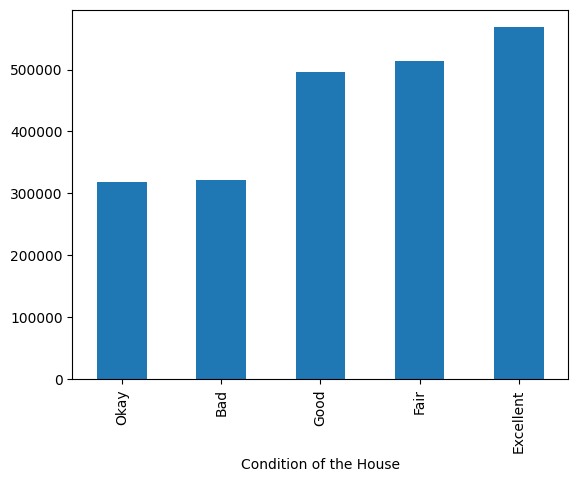

In [22]:
df.groupby('Condition of the House').mean()['Sale Price'].sort_values().plot(kind='bar')

In [23]:
df['Condition of the House']=df['Condition of the House'].map({'Bad':1,'Okay':1,'Fair':2,'Good':2,'Excellent':3})

In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [25]:
df.rename(columns={'Condition of the House':'Condition','Sale Price': 'Sale_Price'},inplace=True)

In [26]:
mod=ols('Sale_Price ~ Condition',df).fit()

In [27]:
zip=df.groupby('Zipcode').mean()['Sale_Price'].sort_values()

In [28]:
zip=pd.cut(zip,bins=70,include_lowest=True,labels=[i for i in range(1,71)])

In [29]:
zip.head()

Zipcode
98002.0    1
98168.0    1
98032.0    2
98001.0    4
98148.0    5
Name: Sale_Price, dtype: category
Categories (70, int64): [1 < 2 < 3 < 4 ... 67 < 68 < 69 < 70]

In [30]:
def zipgroup(code):
    global zip
    return zip[code]
df['Zipcode']=df['Zipcode'].apply(zipgroup)

In [31]:
lat_long=pd.pivot_table(df,values=["Sale_Price"],columns=['Latitude','Longitude'])

In [32]:
lat_long.sort_values('Sale_Price',axis=1,inplace=True)

In [33]:
lat_long.head()

Latitude    47.2638  47.4739  47.6499  47.4808  47.4799  47.4727  47.4752  \
Longitude  -121.906 -122.280 -121.909 -122.315 -122.296 -122.270 -122.271   
Sale_Price  75000.0  78000.0  80000.0  81000.0  82500.0  83000.0  84000.0   

Latitude    47.3897  47.3026  47.5098  ...    47.6303    47.6304             \
Longitude  -122.236 -122.363 -122.334  ...   -122.362   -122.236   -122.234   
Sale_Price  85000.0  89000.0  89950.0  ...  1129575.0  1129575.0  1129575.0   

Latitude      47.6305               47.6306    47.6307               47.6308  \
Longitude    -122.354   -122.240   -122.288   -122.367   -122.354   -122.369   
Sale_Price  1129575.0  1129575.0  1129575.0  1129575.0  1129575.0  1129575.0   

Latitude      47.6303  
Longitude    -122.215  
Sale_Price  1129575.0  

[1 rows x 20828 columns]

In [34]:
points=pd.cut(lat_long.values[0],bins=20828,labels=[i for i in range(1,20829)])

In [35]:
points

[1, 60, 99, 119, 149, ..., 20828, 20828, 20828, 20828, 20828]
Length: 20828
Categories (20828, int64): [1 < 2 < 3 < 4 ... 20825 < 20826 < 20827 < 20828]

In [36]:
lat_long.loc['Points']=points

In [37]:
lat_long.columns

MultiIndex([(47.2638, -121.906),
            (47.4739,  -122.28),
            (47.6499, -121.909),
            (47.4808, -122.315),
            (47.4799, -122.296),
            (47.4727,  -122.27),
            (47.4752, -122.271),
            (47.3897, -122.236),
            (47.3026, -122.363),
            (47.5098, -122.334),
            ...
            (47.6303, -122.362),
            (47.6304, -122.236),
            (47.6304, -122.234),
            (47.6305, -122.354),
            (47.6305,  -122.24),
            (47.6306, -122.288),
            (47.6307, -122.367),
            (47.6307, -122.354),
            (47.6308, -122.369),
            (47.6303, -122.215)],
           names=['Latitude', 'Longitude'], length=20828)

In [38]:
def lat_long_convert(row):
    global lat_long
    lat=row['Latitude']
    long=row['Longitude']
    return lat_long[(lat,long)].loc['Points']
df['LatLong']=df.apply(lat_long_convert,axis=1)

In [39]:
df.drop(columns=['Latitude','Longitude'],inplace=True)

In [40]:
df['LatLong'].corr(df['Sale_Price'])

0.9975118905374004

<Axes: xlabel='Condition'>

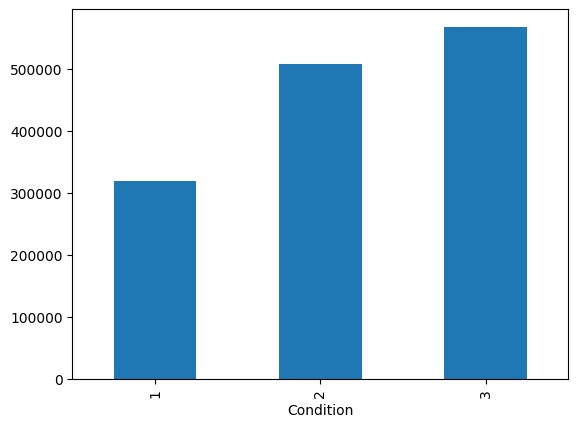

In [41]:
df.groupby('Condition').mean()['Sale_Price'].plot(kind='bar')

In [42]:
df.drop(columns=['ID'],inplace=True)
df.corr()

Sale_Price  No of Bedrooms  \
Sale_Price                                   1.000000        0.339407   
No of Bedrooms                               0.339407        1.000000   
No of Bathrooms                              0.535124        0.515813   
Flat Area (in Sqft)                          0.695170        0.576628   
Lot Area (in Sqft)                           0.101319        0.031692   
No of Floors                                 0.298913        0.175536   
Waterfront View                              0.155894       -0.006578   
No of Times Visited                          0.356114        0.079575   
Condition                                    0.086536        0.046951   
Overall Grade                                0.680914        0.349223   
Area of the House from Basement (in Sqft)    0.606527        0.477549   
Basement Area (in Sqft)                      0.307513        0.303294   
Zipcode                                      0.712390        0.116467   
Living Area after Renovation (in Sqft)       0.629944        0.391771   
Lot Area after Renovation (in Sqft)          0.092325        0.029264   
Years Since Renovation                      -0.118220       -0.165368   
LatLong                                      0.997512        0.337679   

                                           No of Bathrooms  \
Sale_Price                                        0.535124   
No of Bedrooms                                    0.515813   
No of Bathrooms                                   1.000000   
Flat Area (in Sqft)                               0.754568   
Lot Area (in Sqft)                                0.087732   
No of Floors                                      0.500776   
Waterfront View                                   0.063761   
No of Times Visited                               0.187791   
Condition                                        -0.002280   
Overall Grade                                     0.635638   
Area of the House from Basement (in Sqft)         0.685088   
Basement Area (in Sqft)                           0.283798   
Zipcode                                           0.229531   
Living Area after Renovation (in Sqft)            0.568568   
Lot Area after Renovation (in Sqft)               0.087226   
Years Since Renovation                           -0.536740   
LatLong                                           0.533726   

                                           Flat Area (in Sqft)  \
Sale_Price                                            0.695170   
No of Bedrooms                                        0.576628   
No of Bathrooms                                       0.754568   
Flat Area (in Sqft)                                   1.000000   
Lot Area (in Sqft)                                    0.172721   
No of Floors                                          0.354142   
Waterfront View                                       0.103841   
No of Times Visited                                   0.284678   
Condition                                             0.007678   
Overall Grade                                         0.705725   
Area of the House from Basement (in Sqft)             0.876226   
Basement Area (in Sqft)                               0.435142   
Zipcode                                               0.295506   
Living Area after Renovation (in Sqft)                0.756185   
Lot Area after Renovation (in Sqft)                   0.183223   
Years Since Renovation                               -0.343788   
LatLong                                               0.694184   

                                           Lot Area (in Sqft)  No of Floors  \
Sale_Price                                           0.101319      0.298913   
No of Bedrooms                                       0.031692      0.175536   
No of Bathrooms                                      0.087732      0.500776   
Flat Area (in Sqft)                                  0.172721      0.354142   
Lot Area (in Sqft)         

In [43]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [44]:
Y=df['Sale_Price']
X=df.drop(columns=['Sale_Price'])

In [45]:
X=scale.fit_transform(X)

In [46]:
X=pd.DataFrame(X,columns=df.drop(columns=['Sale_Price']).columns)

In [47]:
X.corr()

No of Bedrooms  No of Bathrooms  \
No of Bedrooms                                   1.000000         0.515813   
No of Bathrooms                                  0.515813         1.000000   
Flat Area (in Sqft)                              0.576628         0.754568   
Lot Area (in Sqft)                               0.031692         0.087732   
No of Floors                                     0.175536         0.500776   
Waterfront View                                 -0.006578         0.063761   
No of Times Visited                              0.079575         0.187791   
Condition                                        0.046951        -0.002280   
Overall Grade                                    0.349223         0.635638   
Area of the House from Basement (in Sqft)        0.477549         0.685088   
Basement Area (in Sqft)                          0.303294         0.283798   
Zipcode                                          0.116467         0.229531   
Living Area after Renovation (in Sqft)           0.391771         0.568568   
Lot Area after Renovation (in Sqft)              0.029264         0.087226   
Years Since Renovation                          -0.165368        -0.536740   
LatLong                                          0.337679         0.533726   

                                           Flat Area (in Sqft)  \
No of Bedrooms                                        0.576628   
No of Bathrooms                                       0.754568   
Flat Area (in Sqft)                                   1.000000   
Lot Area (in Sqft)                                    0.172721   
No of Floors                                          0.354142   
Waterfront View                                       0.103841   
No of Times Visited                                   0.284678   
Condition                                             0.007678   
Overall Grade                                         0.705725   
Area of the House from Basement (in Sqft)             0.876226   
Basement Area (in Sqft)                               0.435142   
Zipcode                                               0.295506   
Living Area after Renovation (in Sqft)                0.756185   
Lot Area after Renovation (in Sqft)                   0.183223   
Years Since Renovation                               -0.343788   
LatLong                                               0.694184   

                                           Lot Area (in Sqft)  No of Floors  \
No of Bedrooms                                       0.031692      0.175536   
No of Bathrooms                                      0.087732      0.500776   
Flat Area (in Sqft)                                  0.172721      0.354142   
Lot Area (in Sqft)                                   1.000000     -0.005162   
No of Floors                                        -0.005162      1.000000   
Waterfront View                                      0.021605      0.023719   
No of Times Visited                                  0.074668      0.029504   
Condition                                           -0.025938     -0.092188   
Overall Grade                                        0.102314      0.461368   
Area of the House from Basement (in Sqft)            0.183492      0.524031   
Basement Area (in Sqft)                              0.015252     -0.245572   
Zipcode                                             -0.030900      0.153589   
Living Area after Renovation (in Sqft)               0.144507      0.280106   
Lot Area after Renovation (in Sqft)                  0.718527     -0.011204   
Years Since Renovation                              -0.052946     -0.504628   
LatLong                                              0.101520      0.297912   

                                           Waterfront View  \
No of Bedrooms                                   -0.006578   
No of Bathrooms                                   0.063761   
Flat Area (in Sqft)                               0.103841   
L

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
while X.shape[1]>0:
    vif=pd.Series([VIF(X,i) for i in range(X.shape[1])],index=X.columns)
    if vif.max()>6:
        print(vif[vif==vif.max()].index)
        X.drop(columns=[vif[vif==vif.max()].index[0]],inplace=True)
    else: 
        break


Index(['Flat Area (in Sqft)'], dtype='object')


In [49]:
vif

No of Bedrooms                               1.629318
No of Bathrooms                              3.366906
Lot Area (in Sqft)                           2.099379
No of Floors                                 1.962621
Waterfront View                              1.208741
No of Times Visited                          1.485184
Condition                                    1.088352
Overall Grade                                3.163528
Area of the House from Basement (in Sqft)    4.997622
Basement Area (in Sqft)                      2.037570
Zipcode                                      2.677713
Living Area after Renovation (in Sqft)       2.904485
Lot Area after Renovation (in Sqft)          2.119380
Years Since Renovation                       2.038047
LatLong                                      5.762730
dtype: float64

In [50]:
from sklearn.model_selection import train_test_split as tts


In [51]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=.3,random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr=LinearRegression()

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15126, 15), (6483, 15), (15126,), (6483,))

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
lr.score(x_test,y_test)

0.9951525463706065

# Backward Elimination

In [70]:
def backward_elimination(x,y):
    model=LinearRegression()
    model.fit(x,y)
    base=model.score(x_test,y_test)
    fcol=np.array(x.columns).tolist()
    data=x[:]
    cols=[]
    r=[]
    while True:
        curr=None
        diff=-100
        r2=base
        if len(fcol)==1:
            break
        for col in fcol:
            temp=data.drop(columns=[col])
            model.fit(temp,y)
            temp_r2=model.score(temp,y)
            if temp_r2-base > diff:
                curr=col
                diff=temp_r2-base
                r2=temp_r2
                                
        if diff==0:
            break
        else:
            base=r2
            cols.append(curr)
            r.append(r2)
            data.drop(columns=[curr],inplace=True)
            fcol.remove(curr)
            print(curr,r2) 
    return cols
            

In [72]:
cols=backward_elimination(x_train,y_train)

C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=[curr],inplace=True)
C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=[curr],inplace=True)
C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Lot Area after Renovation (in Sqft) 0.9950190673376033
Lot Area (in Sqft) 0.9950190671621324
No of Floors 0.9950190509232245


C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=[curr],inplace=True)
C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=[curr],inplace=True)
C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Waterfront View 0.9950190030735907
No of Bathrooms 0.9950185897459725
Years Since Renovation 0.9950182087125634
No of Bedrooms 0.9950175151795544
No of Times Visited 0.9950167480566922
Condition 0.9950150749965035
Zipcode 0.9950103676442845
Overall Grade 0.9950058694507513
Basement Area (in Sqft) 0.9950001175472176
Living Area after Renovation (in Sqft) 0.9949962966535957
Area of the House from Basement (in Sqft) 0.994986781696839


C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=[curr],inplace=True)
C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=[curr],inplace=True)
C:\Users\Atharv Karchi\AppData\Local\Temp\ipykernel_14900\142260122.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [76]:
len(cols),x_train.shape

(14, (15126, 15))